<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Quantum_Thermalization_and_Entropy_Influence_A_Wigner_Function_Perspective_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 34.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(
<ipython-input-1-1af63f0a864e>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


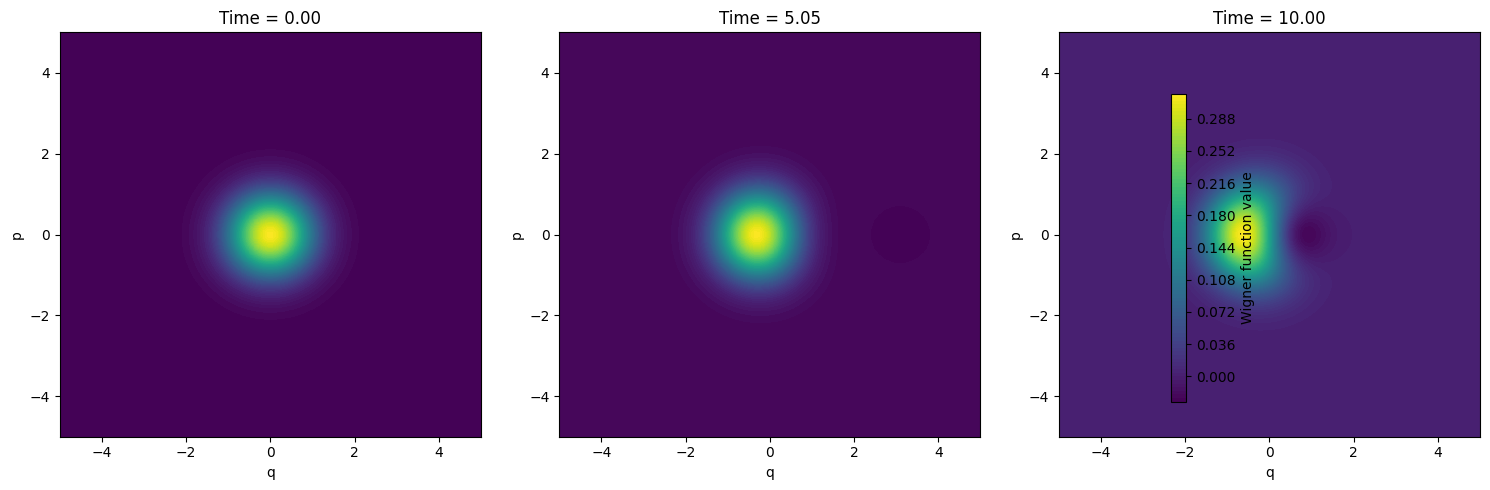

In [1]:
# Let's prepare a Python notebook simulation using a simplified model.
# For this example, let's consider a quantum harmonic oscillator and apply the equation dρ/dt = -[F, ρ]
# with a Wigner function representation. This example will focus on visualizing the quantum state's
# evolution in phase space under a perturbation.
!pip install qutip

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from qutip import wigner, Qobj, basis, sigmax, sigmay, sigmaz, qeye

# Define constants for the system (using arbitrary units)
omega = 1.0  # Frequency of the harmonic oscillator
lambda_param = 0.1  # Strength of the perturbation
hbar = 1  # Reduced Planck's constant
time_points = np.linspace(0, 10, 100)  # Time points for simulation

# Define the Hamiltonian of the system
H = omega * (sigmax() + sigmay() + sigmaz()) / np.sqrt(3)

# Define the initial state of the system (ground state)
psi0 = basis(2, 0)

# Define the Lindblad dissipators for modeling decoherence (not used in this simplified example)
# For a more comprehensive model, these could be added to simulate interaction with an environment

# Define the time evolution function using the commutator
def time_evolution(t, y):
    # Convert the state back to a density matrix (Qobj)
    rho = Qobj(y.reshape((2,2)), dims=[[2], [2]])

    # Calculate the commutator [H, rho]
    commutator = -1j * (H * rho - rho * H)

    # Flatten the result to vector form and return real part (imaginary part should be zero for valid ρ)
    return commutator.full().flatten().real

# Initial state vector (flattened density matrix)
y0 = psi0 * psi0.dag()
y0_vec = y0.full().flatten().real

# Solve the differential equation
sol = solve_ivp(time_evolution, [time_points[0], time_points[-1]], y0_vec, t_eval=time_points, method='RK45')

# Visualize the evolution of the Wigner function at different times
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
times_to_plot = [0, len(time_points) // 2, -1]

for i, time_idx in enumerate(times_to_plot):
    # Extract the density matrix at this time
    rho_t = Qobj(sol.y[:,time_idx].reshape((2,2)), dims=[[2], [2]])

    # Calculate the Wigner function
    W = wigner(rho_t, np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

    # Plot the Wigner function
    cont = axes[i].contourf(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100), W, 100)
    axes[i].set_title(f'Time = {time_points[time_idx]:.2f}')
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('p')

fig.colorbar(cont, ax=axes.ravel().tolist(), shrink=0.8, label='Wigner function value')
plt.tight_layout()
plt.show()

# This code outlines the process for setting up the simulation. Note that specific details, such as the system's parameters,
# and the initial state, might need to be adjusted based on the system being modeled.
# The visualization part focuses on the Wigner function, which represents the quantum state in phase space.
